### import dataset

In [1]:
import pandas as pd
df = pd.read_csv("fetal_health.csv")
df.head(4)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0


#### train model through LogisticRegression

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X=df.drop('fetal_health', axis=1)
y=df['fetal_health']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

C:\Users\SHUBHAM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8685446009389671

In [7]:
y_test.shape,X_test.shape

((426,), (426, 21))

### Accuracy = right_prediction/total_prediction

y_test.tolist()

In [8]:
y_pred = model.predict(X_test)
y_pred

array([1., 1., 1., 1., 1., 3., 1., 3., 1., 1., 1., 3., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 2., 1., 1., 3., 3., 1., 1., 1., 1., 1., 1., 2.,
       1., 1., 1., 3., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1.,
       1., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 2., 2., 1., 2., 1.,
       1., 1., 1., 1., 3., 1., 3., 1., 2., 2., 1., 2., 1., 3., 1., 1., 2.,
       3., 1., 1., 1., 1., 3., 3., 3., 1., 2., 1., 3., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 2., 1., 3., 1., 3., 1., 1., 2., 1., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 2., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 3., 2., 2., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [9]:
model.predict_proba(X_test)

array([[9.02697774e-01, 9.59984101e-02, 1.30381567e-03],
       [8.27495826e-01, 1.16049320e-01, 5.64548545e-02],
       [9.27223701e-01, 6.56768001e-02, 7.09949864e-03],
       ...,
       [9.56570350e-01, 4.33351309e-02, 9.45187454e-05],
       [8.62039535e-01, 1.17012578e-01, 2.09478868e-02],
       [9.33422132e-01, 6.65498800e-02, 2.79879452e-05]])

### precision_recall

In [10]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         1.0       0.90      0.95      0.93       333
         2.0       0.70      0.47      0.56        64
         3.0       0.73      0.76      0.75        29

    accuracy                           0.87       426
   macro avg       0.78      0.73      0.74       426
weighted avg       0.86      0.87      0.86       426



### f1 score

In [11]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[318,   9,   6],
       [ 32,  30,   2],
       [  3,   4,  22]])

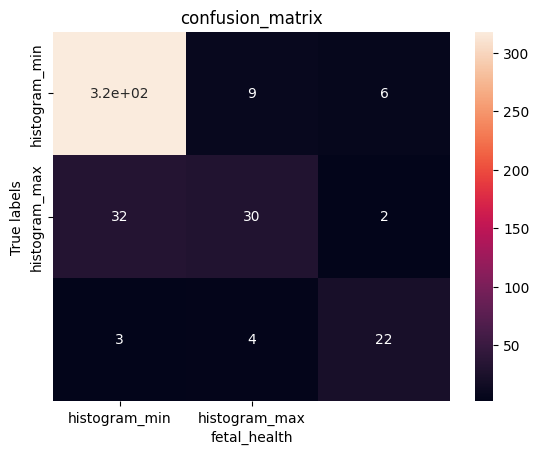

In [12]:
import  seaborn as sns
from matplotlib import pyplot as plt

classes = ['histogram_min','histogram_max']
sns.heatmap(cm, annot= True,xticklabels=classes,yticklabels = classes)
plt.xlabel("fetal_health")
plt.ylabel('True labels')
plt.title('confusion_matrix')
plt.show()

#### scale_data

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaler.fit(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
X_train.head(3)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
1233,125.0,0.0,0.0,0.008,0.000,0.0,0.0,32.0,1.1,3.0,...,51.0,96.0,147.0,4.0,0.0,126.0,125.0,127.0,2.0,0.0
480,140.0,0.0,0.0,0.001,0.000,0.0,0.0,60.0,0.8,32.0,...,120.0,79.0,199.0,9.0,0.0,141.0,141.0,142.0,3.0,0.0
1111,122.0,0.0,0.0,0.000,0.001,0.0,0.0,20.0,1.8,0.0,...,39.0,103.0,142.0,1.0,0.0,120.0,119.0,121.0,3.0,0.0


In [15]:
X_train_scaled

array([[-0.84401403, -0.8223883 , -0.20320955, ..., -0.7667958 ,
        -0.58017309, -0.52452553],
       [ 0.68060404, -0.8223883 , -0.20320955, ...,  0.27032007,
        -0.5456556 , -0.52452553],
       [-1.14893765, -0.8223883 , -0.20320955, ..., -1.18164215,
        -0.5456556 , -0.52452553],
       ...,
       [-1.14893765,  0.4713793 , -0.20320955, ..., -0.83593686,
         0.42083412, -0.52452553],
       [-1.86042608, -0.04612774, -0.20320955, ..., -0.62851369,
         0.90407899, -0.52452553],
       [ 0.88388645, -0.56363478, -0.20320955, ...,  0.75430748,
        -0.51113811,  1.11298001]])

### training_the_data_using_svm:rbf kernel:(no scaling)

In [16]:
from sklearn.svm import SVC
model = SVC(kernel="rbf")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

model.n_iter_

              precision    recall  f1-score   support

         1.0       0.89      0.96      0.92       333
         2.0       0.62      0.41      0.49        64
         3.0       0.82      0.62      0.71        29

    accuracy                           0.86       426
   macro avg       0.77      0.66      0.71       426
weighted avg       0.84      0.86      0.84       426



array([288, 178, 132], dtype=int32)

### training_the_data_using_svm:rbf kernel:(with scaling)

In [17]:
from sklearn.svm import SVC
model = SVC(kernel="rbf")
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

model.n_iter_

              precision    recall  f1-score   support

         1.0       0.94      0.95      0.95       333
         2.0       0.70      0.72      0.71        64
         3.0       0.92      0.76      0.83        29

    accuracy                           0.90       426
   macro avg       0.85      0.81      0.83       426
weighted avg       0.90      0.90      0.90       426



array([486, 311, 235], dtype=int32)

### training_the_data_using_svm:rbf kernel:(with scaling)


In [18]:
from sklearn.svm import SVC
model =SVC(kernel="linear")
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

model.n_iter_

              precision    recall  f1-score   support

         1.0       0.94      0.94      0.94       333
         2.0       0.66      0.64      0.65        64
         3.0       0.76      0.76      0.76        29

    accuracy                           0.88       426
   macro avg       0.79      0.78      0.78       426
weighted avg       0.88      0.88      0.88       426



array([10651,  6849,  1622], dtype=int32)

### training_the_data_using_svm:rbf kernel:(no scaling)


In [19]:
from sklearn.svm import SVC
model = SVC(kernel="linear")

model.fit(X_train,y_train)
y_pred= model.predict(X_test)
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

model.n_iter_

              precision    recall  f1-score   support

         1.0       0.93      0.95      0.94       333
         2.0       0.63      0.53      0.58        64
         3.0       0.71      0.76      0.73        29

    accuracy                           0.87       426
   macro avg       0.76      0.75      0.75       426
weighted avg       0.87      0.87      0.87       426



array([5731418,  748895,  972881], dtype=int32)

### scaling the data with pipeline

In [20]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scale',StandardScaler()),
    ('svc',SVC(kernel="rbf"))
])
    

In [25]:
pipeline.fit(X_train,y_train)
y_pred =pipeline.predict(X_test)
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

pipeline.n_iter_

              precision    recall  f1-score   support

         1.0       0.89      0.96      0.92       333
         2.0       0.62      0.41      0.49        64
         3.0       0.82      0.62      0.71        29

    accuracy                           0.86       426
   macro avg       0.77      0.66      0.71       426
weighted avg       0.84      0.86      0.84       426



array([288, 178, 132], dtype=int32)

In [2]:
###

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt

<Axes: xlabel='fetal_health'>

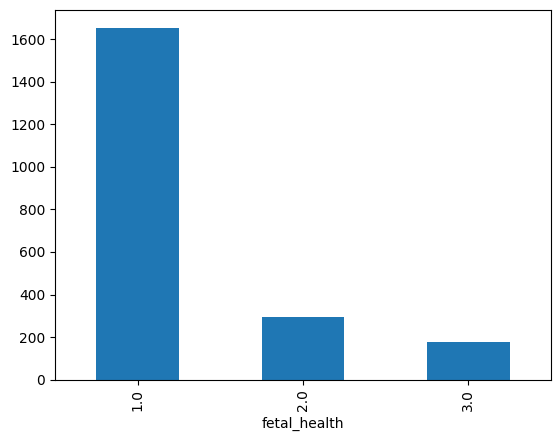

In [6]:
df.fetal_health.value_counts().plot(kind = 'bar')

In [8]:
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test ,y_train, y_test = train_test_split(X,y, test_size=0.2,stratify=y, random_state=42)


In [11]:
### train model